<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/EpsilonGreedy_Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import matplotlib.pyplot as plt
import numpy as np

In [0]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [4]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

rewards = np.zeros(NUM_TRIALS)
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_j = np.argmax([b.p for b in bandits])
print("optimal j:", optimal_j)

optimal j: 2


In [0]:
for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

In [6]:
# print mean estimates for each bandit
for b in bandits:
  print("mean estimate:", b.p_estimate)

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num times selected optimal bandit:", num_optimal)

mean estimate: 0.20891364902506968
mean estimate: 0.474308300395257
mean estimate: 0.7512862616310872
total reward earned: 7178.0
overall win rate: 0.7178
num_times_explored: 1014
num_times_exploited: 8986
num times selected optimal bandit: 9135


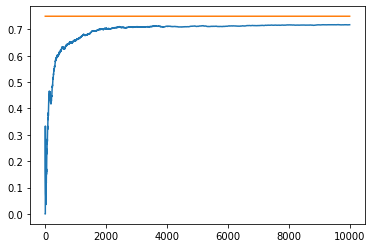

In [7]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show()